# Project on Win Prediction Dataset

* Group Members :
1. Jyoti Singla
2. Rishabh Raibhandar 

## Objective 1: Predictive Analytics - Build a ML model to predict the probability of win/loss for bidding activities for a potential client.


## Objective 2: Prescriptive Analytics – Identify variable/s that are most likely to help in converting an opportunity into a win.

## 1. Understanding the problem and Objective

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

In [215]:
df = pd.read_excel('Win_Prediction_Data.xlsx')
df.head(10)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
5,Internal,Solution 32,2011-05-24,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
6,Internal,Solution 59,2011-11-03,Sector 2,L10,Mervin Harwood,rahul sharma,526176.47,Won
7,Govt,Solution 7,2012-09-17,Sector 13,L5,Sargar Deep Rao,Vidur Hukle,409705.88,Lost
8,Consumer Good,Solution 42,2012-04-11,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94,Won
9,Internal,Solution 59,2011-11-17,Sector 20,Others,Sargar Deep Rao,Hardeep Suksma,558823.53,Lost


In [4]:
## to create the simple report ProfileReport
profile = ProfileReport(df,title = 'Pandas Profiling Report',explorative =True)

In [5]:
## check to see the profile of the dataset

profile.to_widgets()

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [218]:
# copy dataset into new_df

new_df = df

### According to the data its a Classification problem I'm using logistic regression, Support vector machine, Descision Tree Classifier and Random Forest Classifier. in this dataset have doing data cleaning, data visualization, feature engineering.

In [219]:
##for html file
profile.to_file('output.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [220]:
df.shape

(10061, 10)

## 2. Understand the data develop some business sense

### Here is a organization data like Different locations , sectors , solution, deal date and deal cost. According to business sense these are the most important columns to efficient to predict win or lost.

## 3. EDA (if you require in this case)

1. maximize insight into a data set
2. uncover underlying structure
3. extract important variables
4. detect outliers and anomalies
5. test underlying assumptions
6. develop parsimonious models
7. determine optimal factor settings.


In [221]:
df.describe().round(2)

,Deal Cost
count,10061.00
mean,766896.87
std,1619893.80
min,0.00
25%,189705.88
50%,382352.94
75%,764705.88
max,36764705.88


In [222]:
# Preliminary Analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
 9   Deal Status       10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 786.1+ KB


In [223]:
pd.DataFrame(df.nunique())

,0
Client Category,41
Solution Type,67
Deal Date,2555
Sector,25
Location,13
VP Name,43
Manager Name,278
Deal Cost,1469
Deal Status Code,2
Deal Status,2


In [224]:
# checking any null data or not
df.isnull().sum()

# as i seen there are 79 values are missing in Client Category

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
Deal Status          0
dtype: int64

In [225]:
# Deal Date range
print('First deal:{}\nLast Deal:{}'.format(df['Deal Date'].min(),df['Deal Date'].max()))


First deal:2011-04-19 00:00:00
Last Deal:2019-06-07 00:00:00


In [226]:
# checking the mode

df['Client Category'].mode()

0    Others
dtype: object

In [227]:
# check the shape which help to see how many records and column we have

df.shape

(10061, 10)

In [228]:
# Removing observation where Deal Cost is 0.
df = df[df["Deal Cost"] > 0 ]
df.shape

(9815, 10)

In [229]:
# Filling null values with mode
df['Client Category'] = df['Client Category'].fillna('Others')
df.isna().sum()

Client Category     0
Solution Type       0
Deal Date           0
Sector              0
Location            0
VP Name             0
Manager Name        0
Deal Cost           0
Deal Status Code    0
Deal Status         0
dtype: int64

In [230]:
df.describe().round(2)

,Deal Cost
count,9815.00
mean,786118.13
std,1635456.94
min,294.12
25%,205882.35
50%,397058.82
75%,781617.64
max,36764705.88


## 4. Provide the results and understanding you got by performing exploratory data analysis.

### In EDA see the data with the help of describe mean, median, mode, standard deviation , removing the outlier, fill na values with meaning full data.

## 5. Data Cleaning


1. Data normalization
2. Data Standardised 
3. quality check
4. data duplication
5. data analysis 

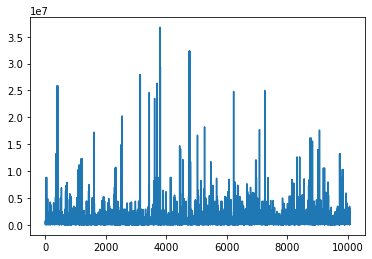

In [231]:
## we see the dealcost data 

plt.plot(df['Deal Cost'])

In [232]:
# Removing Duplicates if any
df = df.drop_duplicates()
df.shape

(9802, 10)

In [233]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal Status
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,Lost


In [234]:
# doing labelEncoding

from sklearn.preprocessing import LabelEncoder

deal_status_code = LabelEncoder()
Client_Category = LabelEncoder()
Solution_Type = LabelEncoder()
Location = LabelEncoder()
Sector = LabelEncoder()

df['Deal Status Code'] = deal_status_code.fit_transform(df['Deal Status Code'])
df['Client Category'] = Client_Category.fit_transform(df['Client Category'])
df['Solution Type'] = Solution_Type.fit_transform(df['Solution Type'])
df['Sector'] = Sector.fit_transform(df['Sector'])
df['Location'] = Location.fit_transform(df['Location'])

In [235]:
# doing scaling on it as to make it normalize in range between 0 and 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df[['Client Category']])
df['Client Category'] = scaler.transform(df[['Client Category']])

In [236]:
scaler.fit(df[['Solution Type']])
df['Solution Type'] = scaler.transform(df[['Solution Type']])

In [237]:
scaler.fit(df[['Sector']])
df['Sector'] = scaler.transform(df[['Sector']])

In [238]:
scaler.fit(df[['Location']])
df['Location'] = scaler.transform(df[['Location']])

In [239]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal Status
0,0.975,0.969697,2012-03-27,0.666667,0.583333,Ekta Zutshi,Gopa Trilochana,150000.00,1,Won
1,0.975,0.969697,2012-09-25,0.666667,0.583333,Ekta Zutshi,Gopa Trilochana,744705.88,1,Won
2,0.475,0.818182,2011-08-01,0.500000,1.000000,Ekta Zutshi,Russell Dahlen,60000.00,0,Lost
3,0.475,0.818182,2011-04-28,0.500000,1.000000,Ekta Zutshi,Russell Dahlen,60000.00,0,Lost
4,0.475,0.378788,2011-06-03,0.500000,1.000000,Ekta Zutshi,Russell Dahlen,80882.35,0,Lost


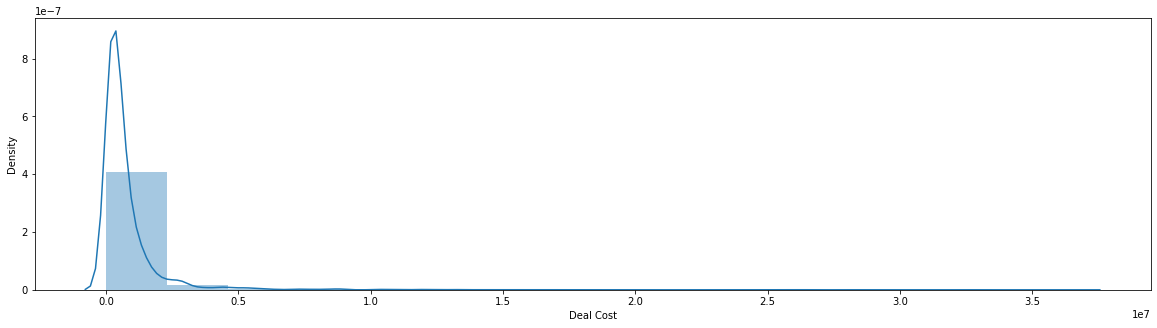

In [240]:
# see the Deal cost 
import seaborn as sns

plt.figure(figsize = (20,5))
sns.distplot(df['Deal Cost'], kde = True, bins = 16);

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9802 entries, 0 to 10060
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9802 non-null   float64       
 1   Solution Type     9802 non-null   float64       
 2   Deal Date         9802 non-null   datetime64[ns]
 3   Sector            9802 non-null   float64       
 4   Location          9802 non-null   float64       
 5   VP Name           9802 non-null   object        
 6   Manager Name      9802 non-null   object        
 7   Deal Cost         9802 non-null   float64       
 8   Deal Status Code  9802 non-null   int64         
 9   Deal Status       9802 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 842.4+ KB


In [242]:
df.head(1)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal Status
0,0.975,0.969697,2012-03-27,0.666667,0.583333,Ekta Zutshi,Gopa Trilochana,150000.0,1,Won


In [243]:
# Combining VP Name and Manager
df['VP Name and Manager'] = df['VP Name'] + ' & '+ df['Manager Name']
df.head(10)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal Status,VP Name and Manager
0,0.975,0.969697,2012-03-27,0.666667,0.583333,Ekta Zutshi,Gopa Trilochana,150000.00,1,Won,Ekta Zutshi & Gopa Trilochana
1,0.975,0.969697,2012-09-25,0.666667,0.583333,Ekta Zutshi,Gopa Trilochana,744705.88,1,Won,Ekta Zutshi & Gopa Trilochana
2,0.475,0.818182,2011-08-01,0.500000,1.000000,Ekta Zutshi,Russell Dahlen,60000.00,0,Lost,Ekta Zutshi & Russell Dahlen
3,0.475,0.818182,2011-04-28,0.500000,1.000000,Ekta Zutshi,Russell Dahlen,60000.00,0,Lost,Ekta Zutshi & Russell Dahlen
4,0.475,0.378788,2011-06-03,0.500000,1.000000,Ekta Zutshi,Russell Dahlen,80882.35,0,Lost,Ekta Zutshi & Russell Dahlen
5,0.475,0.378788,2011-05-24,0.500000,1.000000,Ekta Zutshi,Russell Dahlen,80882.35,0,Lost,Ekta Zutshi & Russell Dahlen
6,0.475,0.818182,2011-11-03,0.458333,0.083333,Mervin Harwood,rahul sharma,526176.47,1,Won,Mervin Harwood & rahul sharma
7,0.275,0.969697,2012-09-17,0.166667,0.583333,Sargar Deep Rao,Vidur Hukle,409705.88,0,Lost,Sargar Deep Rao & Vidur Hukle
8,0.075,0.545455,2012-04-11,0.125000,0.083333,Lilli Storrs,Md. Daud,1032352.94,1,Won,Lilli Storrs & Md. Daud
9,0.475,0.818182,2011-11-17,0.500000,1.000000,Sargar Deep Rao,Hardeep Suksma,558823.53,0,Lost,Sargar Deep Rao & Hardeep Suksma


## 6. Recommending top 5 combination of SBU Head-Bid Manager.

In [244]:
# Subsetting categorical data
# for win cost
df['Deal Status'] = df['Deal Status Code']
df_wins = df[df['Deal Status Code']== 1]
df_wins.shape

(3751, 11)

In [245]:
df_wins['Deal Cost'] = df_wins['Deal Cost']/1000000

In [246]:
df_wins.head(3)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal Status,VP Name and Manager
0,0.975,0.969697,2012-03-27,0.666667,0.583333,Ekta Zutshi,Gopa Trilochana,0.150000,1,1,Ekta Zutshi & Gopa Trilochana
1,0.975,0.969697,2012-09-25,0.666667,0.583333,Ekta Zutshi,Gopa Trilochana,0.744706,1,1,Ekta Zutshi & Gopa Trilochana
6,0.475,0.818182,2011-11-03,0.458333,0.083333,Mervin Harwood,rahul sharma,0.526176,1,1,Mervin Harwood & rahul sharma


In [250]:
max(df_wins['Deal Cost'])

36.76470588

In [251]:

def top_dealcost(x,y,n=5):
    col_names = {'Deal Cost':'Avg Deal Cost', 'Deal Status Code': 'Total Deals'}
    temp_df = df_wins.groupby(['VP Name', 'Manager Name']).agg({'Deal Cost':'mean', 'Deal Status Code': 'sum'}).rename(columns=col_names).sort_values(by='Avg Deal Cost', ascending=False).head(n)
    return temp_df

In [252]:
SBU_Head_Bid_Manager = pd.DataFrame(top_dealcost('VP Name','Manager Name'))

In [253]:
SBU_Head_Bid_Manager

,,Avg Deal Cost,Total Deals
VP Name,Manager Name,,
Mangesh K. Singh,Vinay Kumar,19.411765,3
Varsha Arora,Rahul Singh,15.783725,6
Mervin Harwood,Gopa Trilochana,14.888235,1
Long Bergstrom,Ganesh Malwar,8.821765,1
Mangesh K. Singh,Zulema Perrine,8.516471,9


In [254]:
## for lost cost
df_lost = df[df['Deal Status Code']==0]
df_lost.shape

(6051, 11)

In [255]:
df_lost['Deal Cost'] = df_lost['Deal Cost']/1000000

In [256]:

# df_lost['Solution Type'].value_counts()

In [257]:
max(df_lost['Deal Cost'])

32.35294118

In [258]:
min(df_lost['Deal Cost'])

0.00029412

In [266]:
## dataframe for top 5 lost bidding deal

def lost_dealcost(x,y,n=5):
    col_names = {'Deal Cost':'Avg Deal Cost', 'Deal Status Code': 'Total Deals'}
    temp_df = df_lost.groupby(['VP Name', 'Manager Name']).agg({'Deal Cost':'mean', 'Deal Status Code': 'sum'}).rename(columns=col_names).sort_values(by='Avg Deal Cost').head(n)
    return temp_df

In [267]:
SBU_head_Bid_lost_manager = pd.DataFrame(lost_dealcost('VP Name','Manager Name'))

In [268]:
SBU_head_Bid_lost_manager.head()

,,Avg Deal Cost,Total Deals
VP Name,Manager Name,,
Rahul Bajpai,Akshay Gosh,0.001471,0
Kamelesh Srinivasan,Ayusha Gupta,0.001471,0
Mangesh K. Singh,mayank chaudhary @ rahul,0.001471,0
Long Bergstrom,Ayusha Gupta,0.001471,0
Sargar Deep Rao,mayank chaudhary @ rahul,0.001471,0


## 7. Testing and cross validation

In [47]:
df.drop(['VP Name','Manager Name','Deal Status Code','VP Name and Manager'], axis = 1, inplace = True)


In [48]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,Deal Cost,Deal Status
0,0.975,0.969697,2012-03-27,0.666667,0.583333,150000.00,1
1,0.975,0.969697,2012-09-25,0.666667,0.583333,744705.88,1
2,0.475,0.818182,2011-08-01,0.500000,1.000000,60000.00,0
3,0.475,0.818182,2011-04-28,0.500000,1.000000,60000.00,0
4,0.475,0.378788,2011-06-03,0.500000,1.000000,80882.35,0


In [49]:

# here we doing scaling on Deal Cost

scaler.fit(df[['Deal Cost']])
df['Deal Cost'] = scaler.transform(df[['Deal Cost']])

In [50]:
df.head(10)

,Client Category,Solution Type,Deal Date,Sector,Location,Deal Cost,Deal Status
0,0.975,0.969697,2012-03-27,0.666667,0.583333,0.004072,1
1,0.975,0.969697,2012-09-25,0.666667,0.583333,0.020248,1
2,0.475,0.818182,2011-08-01,0.500000,1.000000,0.001624,0
3,0.475,0.818182,2011-04-28,0.500000,1.000000,0.001624,0
4,0.475,0.378788,2011-06-03,0.500000,1.000000,0.002192,0
5,0.475,0.378788,2011-05-24,0.500000,1.000000,0.002192,0
6,0.475,0.818182,2011-11-03,0.458333,0.083333,0.014304,1
7,0.275,0.969697,2012-09-17,0.166667,0.583333,0.011136,0
8,0.075,0.545455,2012-04-11,0.125000,0.083333,0.028072,1
9,0.475,0.818182,2011-11-17,0.500000,1.000000,0.015192,0


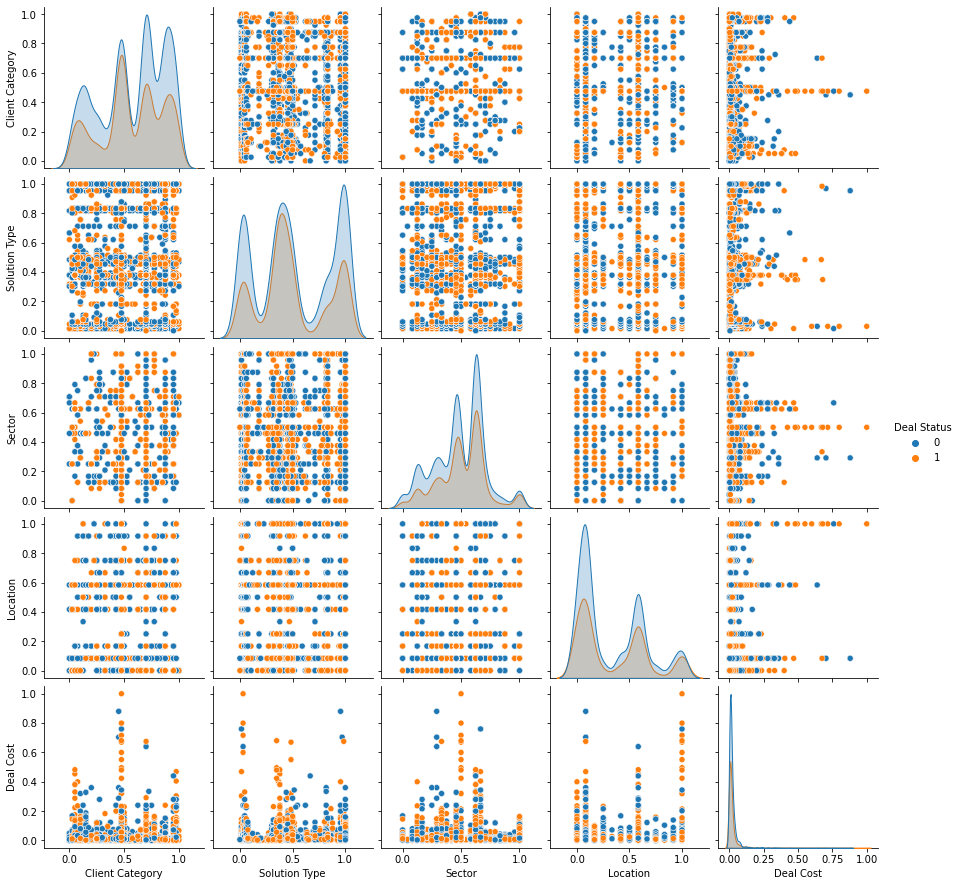

In [51]:
sns.pairplot(df, hue = 'Deal Status')

In [52]:
# Split data in independent(X) and dependent(Y) 
import datetime as dt

X = df.drop(['Deal Status', 'Deal Date'], axis = 1)

# X['Deal Date'] = X['Deal Date'].map(dt.datetime.toordinal)
Y = df['Deal Status']
Y.head()

0    1
1    1
2    0
3    0
4    0
Name: Deal Status, dtype: int64

In [53]:
X.head(3)

,Client Category,Solution Type,Sector,Location,Deal Cost
0,0.975,0.969697,0.666667,0.583333,0.004072
1,0.975,0.969697,0.666667,0.583333,0.020248
2,0.475,0.818182,0.500000,1.000000,0.001624


In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9802 entries, 0 to 10060
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Client Category  9802 non-null   float64
 1   Solution Type    9802 non-null   float64
 2   Sector           9802 non-null   float64
 3   Location         9802 non-null   float64
 4   Deal Cost        9802 non-null   float64
dtypes: float64(5)
memory usage: 459.5 KB


In [55]:
Y.head(3)

0    1
1    1
2    0
Name: Deal Status, dtype: int64

In [56]:
########  Frequency encoding

# for col in X.select_dtypes(include = "datetime64[ns]"):
#     freq_encode = (X.groupby(col).size())/len(X)
#     X[col] = X[col].map(freq_encode)
# X.head()

In [57]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=0)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((7351, 5), (2451, 5), (7351,), (2451,))

## 6. Model building(trying various techniques and at the end justify why you choose a technique over the others)

In [58]:
# find accuracy_score, confusion_matrix

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve , plot_confusion_matrix, plot_precision_recall_curve

def algo(algorithm):
    model = algorithm()
    model.fit(X_train, Y_train)
    predict = model.predict(X_test)
    print('The accuracy of {} model is {}'.format(model, accuracy_score(Y_test, predict).round(2)))
    
    print("\n")
    print("CLASSIFICATION REPORT",'\n',classification_report(Y_test, predict),"\n")
    
    print("CONFUSION MATRIX",'\n')
    
    plot_confusion_matrix(model, X_test, Y_test, cmap = "GnBu")
    
    plot_roc_curve(model,X_test,Y_test)
    
    plot_precision_recall_curve(model,X_test,Y_test)
    
    plot_confusion_matrix(model,X_test,Y_test)
    

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier


In [60]:
from sklearn.model_selection import cross_val_score

svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors = 1)
#xg = XGBClassifier(random_state =123 , n_estimators=25, learning_rate =0.01)


In [61]:
# avg_xg = cross_val_score(xg, X_train, Y_train, cv = 4)
# np.average(avg_xg)

In [62]:
avg_knn = cross_val_score(knn, X_train, Y_train, cv = 4)
np.average(avg_knn)

0.7318741436900658

In [63]:
avg_svm = cross_val_score(svm, X_train, Y_train, cv = 4)
np.average(avg_svm)

0.6137934833666331

In [64]:
avg_dt = cross_val_score(DecisionTreeClassifier(max_depth = 10), X_train, Y_train, cv = 4)
np.average(avg_dt)

0.6697041913798281

In [65]:
avg_rf = cross_val_score(RandomForestClassifier(n_estimators = 60), X_train, Y_train, cv = 4)
np.average(avg_rf)


0.7456127906418837

In [66]:
# create for combination using in RandomsearchCV

model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10,20,25,30,35,40,45,50,55,60,70,80,90,100]
        }
    }     
}

In [67]:
# here we use Randomised searchCV
# so as a see Randomforestclassifier gives best score but we also do some different n_estimators 

from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf_randomCV =  RandomizedSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    clf_randomCV.fit(X_train, Y_train)
  
    scores.append({
        'model': model_name,
        'best_score': clf_randomCV.best_score_,
        'best_params': clf_randomCV.best_params_
    })
    
df_randomCV = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_randomCV

,model,best_score,best_params
0,random_forest,0.773638,{'n_estimators': 40}


In [95]:
clf_randomCV.score(X_test,Y_test)

0.8041615667074663

# Model Performance is 80%

## Precision, Recall, Accuracy, AUC

The accuracy of RandomForestClassifier() model is 0.81


CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.80      0.92      0.86      1537
           1       0.82      0.61      0.70       914

    accuracy                           0.81      2451
   macro avg       0.81      0.77      0.78      2451
weighted avg       0.81      0.81      0.80      2451
 

CONFUSION MATRIX 



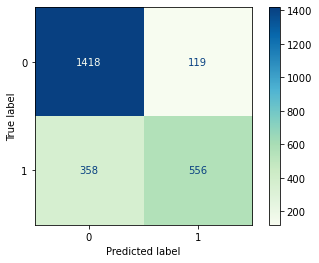

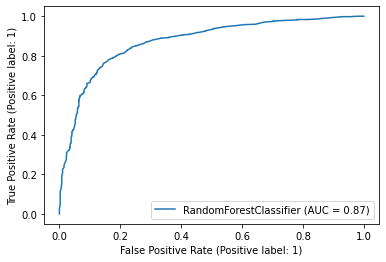

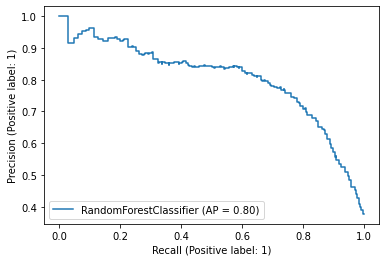

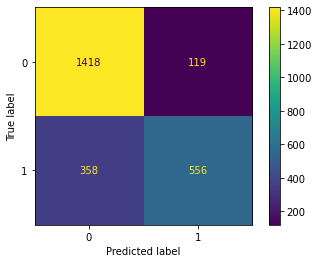

In [117]:
algo(RandomForestClassifier)

## For every False Prediction the loss the company will face

if actual is won, but predicted is loss, then company will lose that deal amount.

## won = 1 and loss = 0

In [97]:
clf_randomCV.score(X_test,Y_test)
preds = clf_randomCV.predict(X_test)

In [98]:
clf_randomCV.predict_proba(X_test)

array([[0.68941667, 0.31058333],
       [0.18      , 0.82      ],
       [0.81      , 0.19      ],
       ...,
       [0.85666667, 0.14333333],
       [0.73      , 0.27      ],
       [0.91      , 0.09      ]])

In [99]:
clf_randomCV.score(X_test,Y_test)

0.8041615667074663

In [100]:
preds = pd.Series(preds, name = "Prediction")
df_results = pd.concat([X_test, Y_test], axis = 1).reset_index()
df_results = pd.concat([df_results,preds],axis = 1)
df_results.head(3)

,index,Client Category,Solution Type,Sector,Location,Deal Cost,Deal Status,Prediction
0,6755,0.875,0.378788,0.625000,0.583333,0.007792,0,0
1,3008,0.150,0.378788,0.458333,0.416667,0.019992,0,1
2,4813,0.375,0.045455,0.708333,0.083333,0.004792,0,0


In [101]:
df_results[(df_results['Deal Status']== 1 ) & (df_results['Prediction']== 0)]['Deal Cost'].count()

372

## 10. Find the results, recommendation and visualizations

<AxesSubplot:>

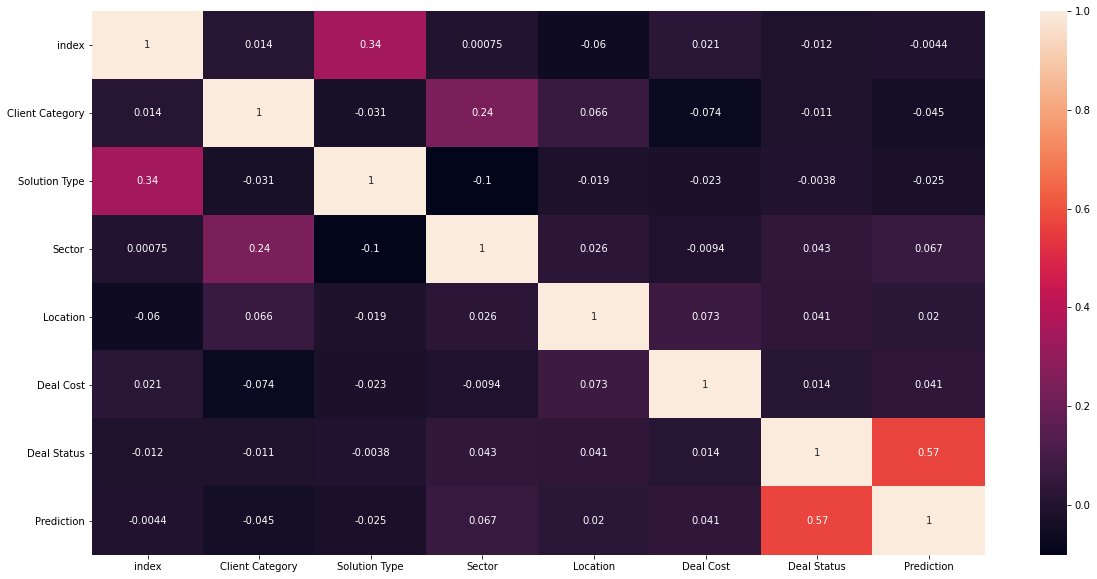

In [102]:
# visualisation 

plt.figure(figsize = (20,10))
corrMatrix = df_results.corr()
sns.heatmap(corrMatrix, annot=True)

In [68]:
new_df.head(1)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.0,Won


In [73]:
final_df = pd.concat([new_df, predict], axis = 1)
final_df.head(20)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Predict
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,1.0
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,1.0
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,0.0
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,0.0
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,0.0
5,Internal,Solution 32,2011-05-24,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,0.0
6,Internal,Solution 59,2011-11-03,Sector 2,L10,Mervin Harwood,rahul sharma,526176.47,Won,1.0
7,Govt,Solution 7,2012-09-17,Sector 13,L5,Sargar Deep Rao,Vidur Hukle,409705.88,Lost,0.0
8,Consumer Good,Solution 42,2012-04-11,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94,Won,1.0
9,Internal,Solution 59,2011-11-17,Sector 20,Others,Sargar Deep Rao,Hardeep Suksma,558823.53,Lost,0.0


In [69]:
predict = pd.DataFrame(clf_randomCV.predict(X))


In [70]:
predict.columns = ['Predict']
predict.head(10)

,Predict
0,1
1,1
2,0
3,0
4,0
5,0
6,1
7,0
8,1
9,0


In [114]:
# final result

result = pd.concat([new_df, predict], axis = 1)
result.head(20)


,Client Category,Solution Type,Deal Date,Sector,Location,Deal Cost,Deal Status,Predict
0,0.975,0.969697,2012-03-27,0.666667,0.583333,0.004072,1.0,1.0
1,0.975,0.969697,2012-09-25,0.666667,0.583333,0.020248,1.0,1.0
2,0.475,0.818182,2011-08-01,0.500000,1.000000,0.001624,0.0,0.0
3,0.475,0.818182,2011-04-28,0.500000,1.000000,0.001624,0.0,0.0
4,0.475,0.378788,2011-06-03,0.500000,1.000000,0.002192,0.0,0.0
5,0.475,0.378788,2011-05-24,0.500000,1.000000,0.002192,0.0,0.0
6,0.475,0.818182,2011-11-03,0.458333,0.083333,0.014304,1.0,1.0
7,0.275,0.969697,2012-09-17,0.166667,0.583333,0.011136,0.0,0.0
8,0.075,0.545455,2012-04-11,0.125000,0.083333,0.028072,1.0,1.0
9,0.475,0.818182,2011-11-17,0.500000,1.000000,0.015192,0.0,0.0


In [109]:
# SBU_Head_Bid_Manager.to_csv('top_deal.csv')

## 11. Bonus: Any other insight or recommendation that you can give from the data which will help the business

## As lost is max as compare to win
## For winning the bid and make it happen there are lot more factor should be known 

### * For winning deals member analysis:

1. we can see in data deal cost is very high as we can see above with vp and manager name with no prior bidding experience in Deal Status
2. in winning bid members though some of them have high deal cost but have prior experience of few deal in Deal Status
3. but some of them have decent deal cost plus more number of deals cracked by them 

### * For lost deals member analysis:

1. by analysis we can see lost deal are more as compare to win (difference is more than half)
2. we analyse in Deal Status lost deals are more and win deals are less
3. after analysis we get to know cost is higher in lost deals as compare to win deals 
4. then we can analyse prior projects experience is zero in lost deals

### * we compare with other factors 

1. solution type is solution group that client require accordingly if we compare both lost and win and then major part is about the solution required
2. so we can observe people who already did work according 'client category','solution type','Sector','Location' with prior  experience manager then we have chances to win 
   
### * loss will be less 
    
1. members who already worked with similar 'location','client category','solution type','sector' dealing will more chance to win 
2. members who have no prior experience can work with prior experience people who got the deal and can overcome from the loss
3. they can also work on strategy and reduce the dealing cost